# Obesity Rist Prediction 

## Data exploration 

In [28]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import numpy as np

In [42]:
train = pd.read_csv("../data/train.csv")

train.shape

(1995, 20)

In [ ]:
train.head()

,PersonID,Age_Years,Weight_Kg,High_Calorie_Food,Vegetable_Intake,Meal_Frequency,Water_Intake,Screen_Time_Hours,Family_Risk,Activity_Level_Score,Gender,Family_History,Snack_Frequency,Smoking_Habit,Alcohol_Consumption,Commute_Mode,Weight_Category,Height_cm,Physical_Activity_Level,Leisure Time Activity
0,P1810,26.000000,109.959714,yes,3.000000,3.000000,2.679137,0.479348,1.000000,0.479348,Female,yes,Occasionally,no,Sometimes,Public_Transportation,Obesity_Type_III,162.277100,NaN,Reading
1,P1021,25.483381,64.848627,no,2.000000,1.000000,1.000000,0.000000,1.000000,0.740633,Female,yes,Occasionally,no,no,Public_Transportation,Overweight_Level_II,156.528800,NaN,Reading
2,P2036,26.000000,104.947703,yes,3.000000,3.000000,2.577210,0.402075,1.000000,0.402075,Female,yes,Occasionally,no,Sometimes,Public_Transportation,Obesity_Type_III,162.116700,NaN,Reading
3,P2201,21.715198,107.868047,Yes,3.031308,3.322455,1.983531,-0.005858,0.987933,0.360441,Male,yes,Occasionally,no,no,Public_Transportation,Normal_Weight,167.748287,NaN,Reading
4,P2649,17.511767,121.460361,yes,1.964873,1.052297,2.025586,0.981999,1.004136,1.162488,Female,yes,Occasionally,no,no,Public_Transportation,Normal_Weight,170.956194,NaN,Gaming


In [ ]:
train.describe()

,Age_Years,Weight_Kg,Vegetable_Intake,Meal_Frequency,Water_Intake,Screen_Time_Hours,Family_Risk,Activity_Level_Score,Height_cm
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,24.461828,86.911808,2.432076,2.703870,2.031146,0.655896,0.817226,1.655651,170.459668
std,8.008088,26.466696,0.525636,0.777698,0.615675,0.605369,0.386378,1.069340,9.386194
min,14.000000,39.371523,0.997823,0.904497,0.923071,-0.086830,-0.048684,-0.128487,145.000000
25%,19.926148,65.965894,2.000000,2.750826,1.627732,0.012705,0.991795,0.947094,163.249100
50%,22.689612,83.014033,2.417635,3.000000,2.000000,0.626719,1.000000,1.616826,170.558400
75%,26.000000,108.180369,3.000000,3.000000,2.526484,1.000000,1.000000,2.291777,177.086124
max,222.000000,173.000000,3.060912,4.061564,3.047066,2.062589,1.060984,5.000000,198.000000


In [43]:
train.drop("PersonID", axis=1, inplace=True)

In [44]:
train.head()

,Age_Years,Weight_Kg,High_Calorie_Food,Vegetable_Intake,Meal_Frequency,Water_Intake,Screen_Time_Hours,Family_Risk,Activity_Level_Score,Gender,Family_History,Snack_Frequency,Smoking_Habit,Alcohol_Consumption,Commute_Mode,Weight_Category,Height_cm,Physical_Activity_Level,Leisure Time Activity
0,26.000000,109.959714,yes,3.000000,3.000000,2.679137,0.479348,1.000000,0.479348,Female,yes,Occasionally,no,Sometimes,Public_Transportation,Obesity_Type_III,162.277100,NaN,Reading
1,25.483381,64.848627,no,2.000000,1.000000,1.000000,0.000000,1.000000,0.740633,Female,yes,Occasionally,no,no,Public_Transportation,Overweight_Level_II,156.528800,NaN,Reading
2,26.000000,104.947703,yes,3.000000,3.000000,2.577210,0.402075,1.000000,0.402075,Female,yes,Occasionally,no,Sometimes,Public_Transportation,Obesity_Type_III,162.116700,NaN,Reading
3,21.715198,107.868047,Yes,3.031308,3.322455,1.983531,-0.005858,0.987933,0.360441,Male,yes,Occasionally,no,no,Public_Transportation,Normal_Weight,167.748287,NaN,Reading
4,17.511767,121.460361,yes,1.964873,1.052297,2.025586,0.981999,1.004136,1.162488,Female,yes,Occasionally,no,no,Public_Transportation,Normal_Weight,170.956194,NaN,Gaming


In [10]:
for col in train.columns:
    if train[col].dtype == 'object':
        print(f"{col}: {train[col].nunique()} unique values")
        print(train[col].value_counts())


High_Calorie_Food: 4 unique values
High_Calorie_Food
yes    1745
no      225
Yes      16
No        9
Name: count, dtype: int64
Gender: 2 unique values
Gender
Male      1020
Female     945
Name: count, dtype: int64
Family_History: 3 unique values
Family_History
yes     1622
no       370
yess       3
Name: count, dtype: int64
Snack_Frequency: 4 unique values
Snack_Frequency
Occasionally    1670
Often            233
Always            50
Never             42
Name: count, dtype: int64
Smoking_Habit: 2 unique values
Smoking_Habit
no     1950
yes      45
Name: count, dtype: int64
Alcohol_Consumption: 4 unique values
Alcohol_Consumption
Sometimes     1303
no             589
Frequently      64
Always           2
Name: count, dtype: int64
Commute_Mode: 5 unique values
Commute_Mode
Public_Transportation    1475
Automobile                451
Walking                    56
Motorbike                   8
Bike                        5
Name: count, dtype: int64
Weight_Category: 7 unique values
Weight_Ca

## Correlations between numeric values (Before encoding)

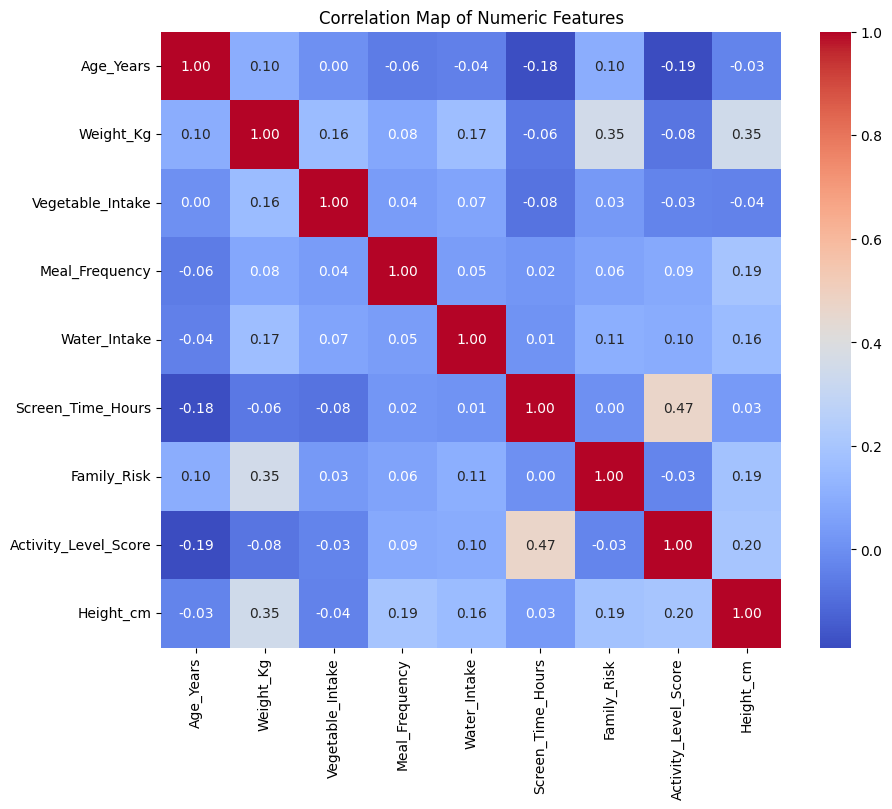

In [11]:
import seaborn as sns

import matplotlib.pyplot as plt

numeric_features = train.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Map of Numeric Features')
plt.show()

In [13]:
train.isna().sum()

PersonID                      0
Age_Years                     0
Weight_Kg                     0
High_Calorie_Food             0
Vegetable_Intake              0
Meal_Frequency                0
Water_Intake                  0
Screen_Time_Hours             0
Family_Risk                   0
Activity_Level_Score          0
Gender                       30
Family_History                0
Snack_Frequency               0
Smoking_Habit                 0
Alcohol_Consumption          37
Commute_Mode                  0
Weight_Category               0
Height_cm                     0
Physical_Activity_Level    1498
Leisure Time Activity         0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_19984\2029922838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_19984\2029922838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_19984\2029922838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_19984\2029922838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

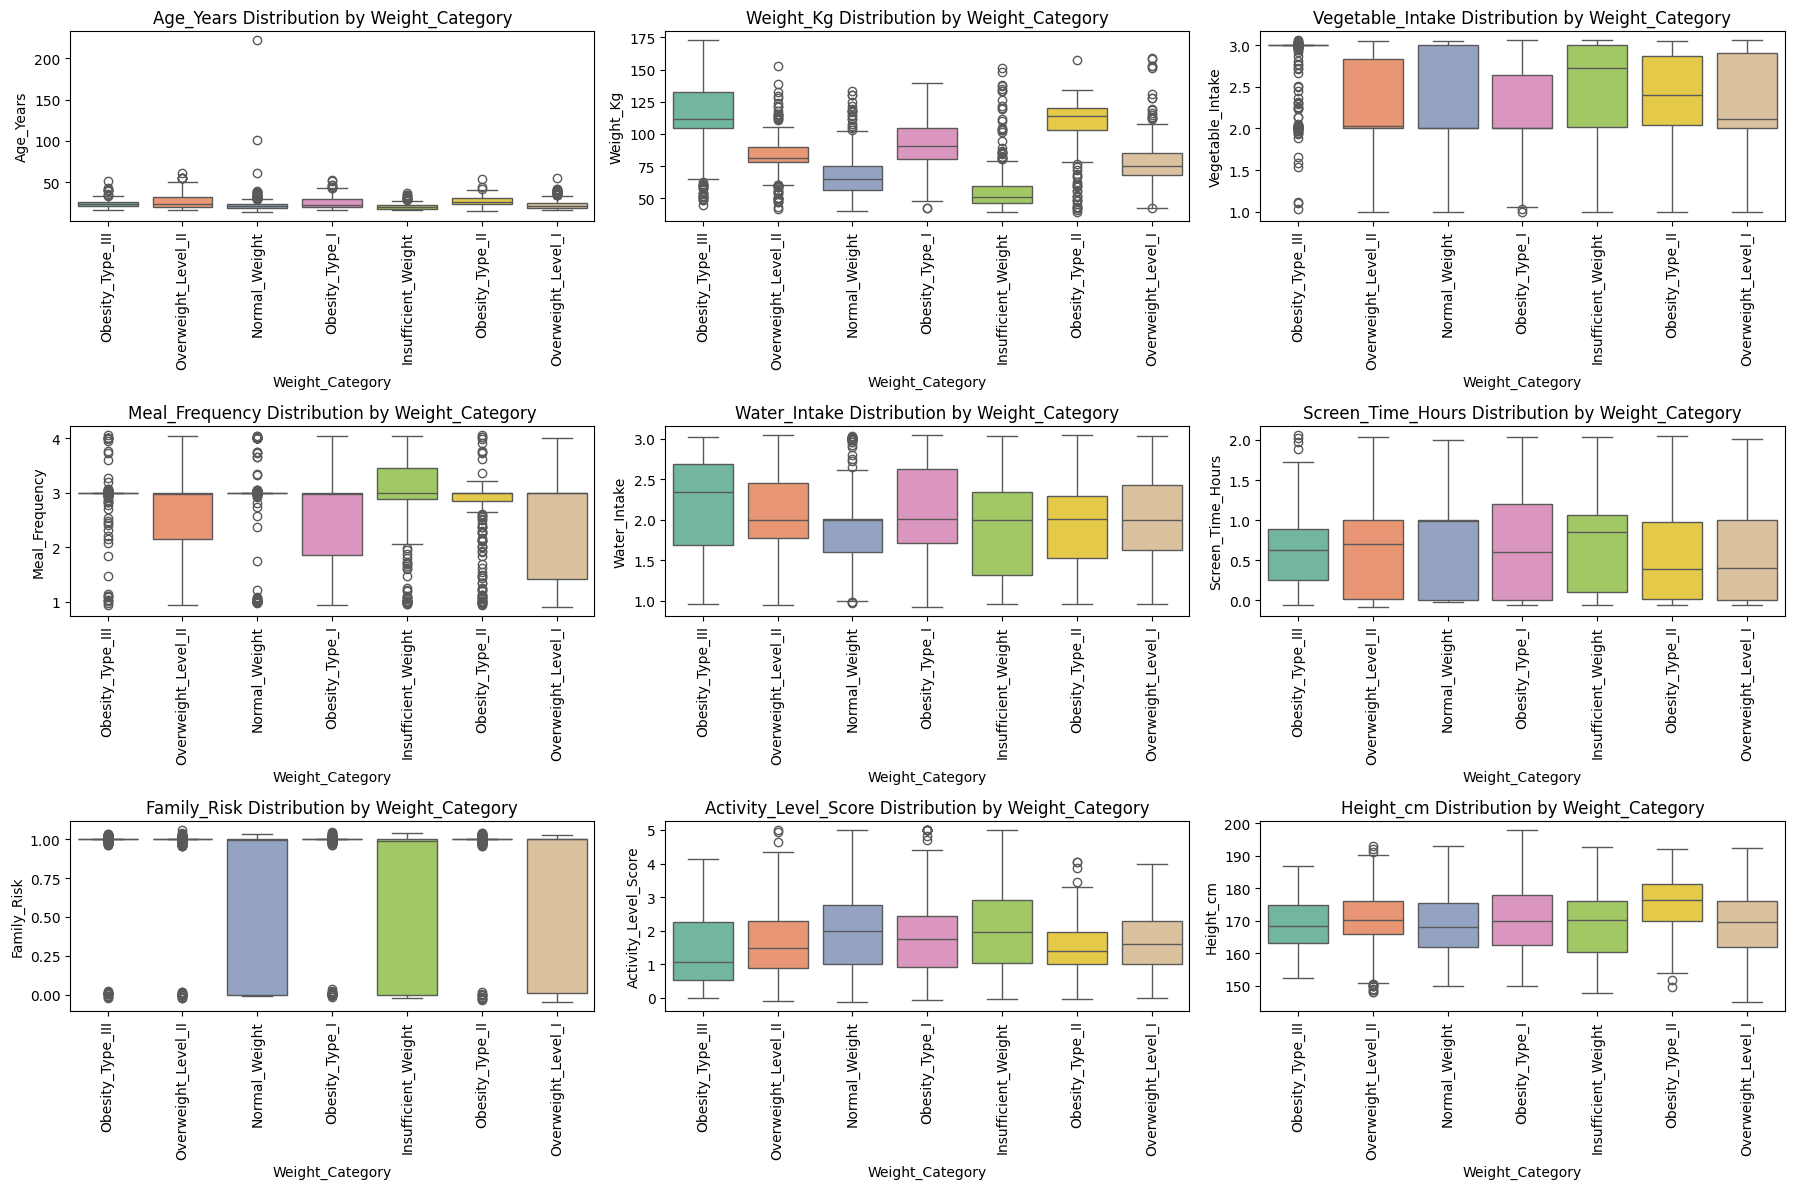

In [18]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(
        data=train,
        x="Weight_Category",
        y=feature,
        palette="Set2"
    )
    plt.title(f"{feature} Distribution by Weight_Category")
    plt.xlabel("Weight_Category")
    plt.ylabel(feature)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [19]:
X,y = train.drop("Weight_Category", axis=1), train["Weight_Category"]

In [ ]:
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.05, upper=0.95):
        self.lower = lower
        self.upper = upper
        self.feature_names_in_ = None
        self.lower_bounds_ = None
        self.upper_bounds_ = None

    def fit(self, X, y=None):
        # Fit only on numeric columns
        numeric_features = X.select_dtypes(include=[np.number]).columns
        self.feature_names_in_ = numeric_features
        self.lower_bounds_ = X[numeric_features].quantile(self.lower)
        self.upper_bounds_ = X[numeric_features].quantile(self.upper)
        return self

    def transform(self, X):
        X_ = X.copy()
        mask = pd.Series(True, index=X_.index)

        for col in self.feature_names_in_:
            mask &= (X_[col] >= self.lower_bounds_[col]) & (X_[col] <= self.upper_bounds_[col])

        # Return filtered data without resetting index
        X_filtered = X_.loc[mask]
        return X_filtered
    

class CategoryRenamer(BaseEstimator, TransformerMixin):
    """
    Custom transformer to fix inconsistent category names
    and unify categorical values across multiple columns.
    """

    def __init__(self):
        # Define renaming mappings for each column
        self.rename_maps = {
            "High_Calorie_Food": {
                "yes": "Yes",
                "no": "No"
            },
            "Family_History": {
                "yes": "Yes",
                "no": "No",
                "yess": "Yes"
            },
            "Smoking_Habit": {
                "yes": "Yes",
                "no": "No"
            },
            "Alcohol_Consumption": {
                "no": "No",
                "Sometimes": "Sometimes",
                "Frequently": "Frequently",
                "Always": "Always"
            },
            "Commute_Mode": {
                "Public_transportation": "Public_Transportation",  # safety fix if typo exists
            },
            "Leisure Time Activity": {
                "Sport": "Sports"  # unify category
            }
        }

    def fit(self, X, y=None):
        return self  # No fitting required

    def transform(self, X):
        X_ = X.copy()
        
        # Standardize capitalization (first letter uppercase, rest lowercase)
        for col in X_.select_dtypes(include="object").columns:
            X_[col] = X_[col].astype(str).str.strip()

        # Apply specific renaming maps
        for col, mapping in self.rename_maps.items():
            if col in X_.columns:
                X_[col] = X_[col].replace(mapping)

        return X_


class MissingValueImputer(BaseEstimator, TransformerMixin):
    """
    Handles missing values for categorical and numeric features.
    Includes smart imputation for Physical_Activity_Level.
    """
    def __init__(self, use_smart_activity_impute=True):
        self.use_smart_activity_impute = use_smart_activity_impute
        self.gender_mode_ = None
        self.alcohol_mode_ = None

    def fit(self, X, y=None):
        self.gender_mode_ = X['Gender'].mode()[0]
        self.alcohol_mode_ = X['Alcohol_Consumption'].mode()[0]
        return self

    def transform(self, X):
        X_ = X.copy()

        # Fill Gender (small number of missing)
        X_['Gender'] = X_['Gender'].fillna(self.gender_mode_)

        # Fill Alcohol_Consumption (also few missing)
        X_['Alcohol_Consumption'] = X_['Alcohol_Consumption'].fillna(self.alcohol_mode_)

        # Fill Physical_Activity_Level — large missing rate
        if self.use_smart_activity_impute:
            X_['Physical_Activity_Level'] = X_.apply(self._impute_activity_level, axis=1)
        else:
            X_['Physical_Activity_Level'] = X_['Physical_Activity_Level'].fillna('Unknown')

        return X_

    def _impute_activity_level(self, row):
        if pd.notnull(row['Physical_Activity_Level']):
            return row['Physical_Activity_Level']
        score = row['Activity_Level_Score']
        if score < 0.3:
            return 'Low'
        elif score < 0.7:
            return 'Medium'
        else:
            return 'High'



In [34]:
outlier_remover = OutlierRemover()
outlier_remover.fit_transform(X)
filtered_train = outlier_remover.transform(X)
print(filtered_train.shape)

(976, 19)


In [45]:
for col in train.columns:
    if train[col].dtype == 'object':
        print(f"{col}: {train[col].nunique()} unique values")
        print(train[col].value_counts())


High_Calorie_Food: 4 unique values
High_Calorie_Food
yes    1745
no      225
Yes      16
No        9
Name: count, dtype: int64
Gender: 2 unique values
Gender
Male      1020
Female     945
Name: count, dtype: int64
Family_History: 3 unique values
Family_History
yes     1622
no       370
yess       3
Name: count, dtype: int64
Snack_Frequency: 4 unique values
Snack_Frequency
Occasionally    1670
Often            233
Always            50
Never             42
Name: count, dtype: int64
Smoking_Habit: 2 unique values
Smoking_Habit
no     1950
yes      45
Name: count, dtype: int64
Alcohol_Consumption: 4 unique values
Alcohol_Consumption
Sometimes     1303
no             589
Frequently      64
Always           2
Name: count, dtype: int64
Commute_Mode: 5 unique values
Commute_Mode
Public_Transportation    1475
Automobile                451
Walking                    56
Motorbike                   8
Bike                        5
Name: count, dtype: int64
Weight_Category: 7 unique values
Weight_Ca

In [48]:
renamer = CategoryRenamer()
renamer.fit_transform(train)
renamed_train = renamer.fit_transform(train)
renamed_train.head()

,Age_Years,Weight_Kg,High_Calorie_Food,Vegetable_Intake,Meal_Frequency,Water_Intake,Screen_Time_Hours,Family_Risk,Activity_Level_Score,Gender,Family_History,Snack_Frequency,Smoking_Habit,Alcohol_Consumption,Commute_Mode,Weight_Category,Height_cm,Physical_Activity_Level,Leisure Time Activity
0,26.000000,109.959714,Yes,3.000000,3.000000,2.679137,0.479348,1.000000,0.479348,Female,Yes,Occasionally,No,Sometimes,Public_Transportation,Obesity_Type_III,162.277100,nan,Reading
1,25.483381,64.848627,No,2.000000,1.000000,1.000000,0.000000,1.000000,0.740633,Female,Yes,Occasionally,No,No,Public_Transportation,Overweight_Level_II,156.528800,nan,Reading
2,26.000000,104.947703,Yes,3.000000,3.000000,2.577210,0.402075,1.000000,0.402075,Female,Yes,Occasionally,No,Sometimes,Public_Transportation,Obesity_Type_III,162.116700,nan,Reading
3,21.715198,107.868047,Yes,3.031308,3.322455,1.983531,-0.005858,0.987933,0.360441,Male,Yes,Occasionally,No,No,Public_Transportation,Normal_Weight,167.748287,nan,Reading
4,17.511767,121.460361,Yes,1.964873,1.052297,2.025586,0.981999,1.004136,1.162488,Female,Yes,Occasionally,No,No,Public_Transportation,Normal_Weight,170.956194,nan,Gaming


In [49]:
for col in renamed_train.columns:
    if renamed_train[col].dtype == 'object':
        print(f"{col}: {renamed_train[col].nunique()} unique values")
        print(renamed_train[col].value_counts())


High_Calorie_Food: 2 unique values
High_Calorie_Food
Yes    1761
No      234
Name: count, dtype: int64
Gender: 3 unique values
Gender
Male      1020
Female     945
nan         30
Name: count, dtype: int64
Family_History: 2 unique values
Family_History
Yes    1625
No      370
Name: count, dtype: int64
Snack_Frequency: 4 unique values
Snack_Frequency
Occasionally    1670
Often            233
Always            50
Never             42
Name: count, dtype: int64
Smoking_Habit: 2 unique values
Smoking_Habit
No     1950
Yes      45
Name: count, dtype: int64
Alcohol_Consumption: 5 unique values
Alcohol_Consumption
Sometimes     1303
No             589
Frequently      64
nan             37
Always           2
Name: count, dtype: int64
Commute_Mode: 5 unique values
Commute_Mode
Public_Transportation    1475
Automobile                451
Walking                    56
Motorbike                   8
Bike                        5
Name: count, dtype: int64
Weight_Category: 7 unique values
Weight_Categor

In [50]:
train.isna().sum()

Age_Years                     0
Weight_Kg                     0
High_Calorie_Food             0
Vegetable_Intake              0
Meal_Frequency                0
Water_Intake                  0
Screen_Time_Hours             0
Family_Risk                   0
Activity_Level_Score          0
Gender                       30
Family_History                0
Snack_Frequency               0
Smoking_Habit                 0
Alcohol_Consumption          37
Commute_Mode                  0
Weight_Category               0
Height_cm                     0
Physical_Activity_Level    1498
Leisure Time Activity         0
dtype: int64

In [51]:
train['Gender']

0       Female
1       Female
2       Female
3         Male
4       Female
         ...  
1990    Female
1991    Female
1992    Female
1993      Male
1994      Male
Name: Gender, Length: 1995, dtype: object

In [53]:
imputer = MissingValueImputer()
imputer.fit(train)
imputed_train = imputer.transform(train)    
imputed_train.head()

,Age_Years,Weight_Kg,High_Calorie_Food,Vegetable_Intake,Meal_Frequency,Water_Intake,Screen_Time_Hours,Family_Risk,Activity_Level_Score,Gender,Family_History,Snack_Frequency,Smoking_Habit,Alcohol_Consumption,Commute_Mode,Weight_Category,Height_cm,Physical_Activity_Level,Leisure Time Activity
0,26.000000,109.959714,yes,3.000000,3.000000,2.679137,0.479348,1.000000,0.479348,Female,yes,Occasionally,no,Sometimes,Public_Transportation,Obesity_Type_III,162.277100,Medium,Reading
1,25.483381,64.848627,no,2.000000,1.000000,1.000000,0.000000,1.000000,0.740633,Female,yes,Occasionally,no,no,Public_Transportation,Overweight_Level_II,156.528800,High,Reading
2,26.000000,104.947703,yes,3.000000,3.000000,2.577210,0.402075,1.000000,0.402075,Female,yes,Occasionally,no,Sometimes,Public_Transportation,Obesity_Type_III,162.116700,Medium,Reading
3,21.715198,107.868047,Yes,3.031308,3.322455,1.983531,-0.005858,0.987933,0.360441,Male,yes,Occasionally,no,no,Public_Transportation,Normal_Weight,167.748287,Medium,Reading
4,17.511767,121.460361,yes,1.964873,1.052297,2.025586,0.981999,1.004136,1.162488,Female,yes,Occasionally,no,no,Public_Transportation,Normal_Weight,170.956194,High,Gaming


In [89]:
# training_pipeline.py

import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ----------------------------
# Custom Transformers
# ----------------------------
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.05, upper=0.95):
        self.lower = lower
        self.upper = upper
        self.feature_names_in_ = None
        self.lower_bounds_ = None
        self.upper_bounds_ = None

    def fit(self, X, y=None):
        numeric_features = X.select_dtypes(include=[np.number]).columns
        self.feature_names_in_ = numeric_features
        self.lower_bounds_ = X[numeric_features].quantile(self.lower)
        self.upper_bounds_ = X[numeric_features].quantile(self.upper)
        return self

    def transform(self, X):
        X_ = X.copy()
        mask = pd.Series(True, index=X_.index)
        for col in self.feature_names_in_:
            mask &= (X_[col] >= self.lower_bounds_[col]) & (X_[col] <= self.upper_bounds_[col])
        return X_.loc[mask]

class CategoryRenamer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.rename_maps = {
            "High_Calorie_Food": {"yes": "Yes", "no": "No"},
            "Family_History": {"yes": "Yes", "no": "No", "yess": "Yes"},
            "Smoking_Habit": {"yes": "Yes", "no": "No"},
            "Alcohol_Consumption": {"no": "No"},
            "Commute_Mode": {"Public_transportation": "Public_Transportation"},
            "Leisure Time Activity": {"Sport": "Sports"}
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        for col in X_.select_dtypes(include="object").columns:
            X_[col] = X_[col].astype(str).str.strip()
        for col, mapping in self.rename_maps.items():
            if col in X_.columns:
                X_[col] = X_[col].replace(mapping)
        return X_

class MissingValueImputer(BaseEstimator, TransformerMixin):
    def __init__(self, use_smart_activity_impute=True):
        self.use_smart_activity_impute = use_smart_activity_impute
        self.gender_mode_ = None
        self.alcohol_mode_ = None

    def fit(self, X, y=None):
        self.gender_mode_ = X['Gender'].mode()[0]
        self.alcohol_mode_ = X['Alcohol_Consumption'].mode()[0]
        return self

    def transform(self, X):
        X_ = X.copy()
        X_['Gender'] = X_['Gender'].fillna(self.gender_mode_)
        X_['Alcohol_Consumption'] = X_['Alcohol_Consumption'].fillna(self.alcohol_mode_)
        if self.use_smart_activity_impute:
            X_['Physical_Activity_Level'] = X_.apply(self._impute_activity_level, axis=1)
        else:
            X_['Physical_Activity_Level'] = X_['Physical_Activity_Level'].fillna('Unknown')
        return X_

    def _impute_activity_level(self, row):
        if pd.notnull(row['Physical_Activity_Level']):
            return row['Physical_Activity_Level']
        score = row['Activity_Level_Score']
        if score < 0.3:
            return 'Low'
        elif score < 0.7:
            return 'Medium'
        else:
            return 'High'

class FeatureEngineer(BaseEstimator, TransformerMixin):
    """
    Adds new features (e.g., BMI) and drops irrelevant columns.
    """
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_ = X.copy()
        
        # Drop features we don't want to include
        drop_cols = ['Activity_Level_Score', 'Height_cm', 'Weight_Kg']  # Weight & Height will be used to create BMI
        for col in drop_cols:
            if col not in X_.columns:
                continue

        # Feature engineering: BMI
        if 'Height_cm' in X_.columns and 'Weight_Kg' in X_.columns:
            X_['Height_m'] = X_['Height_cm'] / 100
            X_['BMI'] = X_['Weight_Kg'] / (X_['Height_m'] ** 2)
            X_ = X_.drop(columns=['Height_cm', 'Weight_Kg', 'Height_m'])
        
        return X_

# ----------------------------
# Main Training Pipeline
# ----------------------------
def main():
    global pipeline, X_train, y_train_enc, y_val_enc, X_val, label_enc
    
    # 1️⃣ Load data
    df = pd.read_csv("../data/raw/train.csv")

    # 2️⃣ Separate target
    y = df['Weight_Category']
    X = df.drop(columns=['Weight_Category', 'PersonID'])

    # 3️⃣ Remove outliers BEFORE splitting
    outlier_remover = OutlierRemover(lower=0.05, upper=0.95)
    X_cleaned = outlier_remover.fit_transform(X)
    y_cleaned = y.loc[X_cleaned.index]

    # 4️⃣ Split train / validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_cleaned, y_cleaned, test_size=0.2, random_state=42, stratify=y_cleaned
    )

    # 5️⃣ Encode target
    label_enc = LabelEncoder()
    y_train_enc = label_enc.fit_transform(y_train)
    y_val_enc = label_enc.transform(y_val)

    # 6️⃣ Categorical features to One-Hot Encode
    categorical_features = [
        "High_Calorie_Food",
        "Gender",
        "Family_History",
        "Snack_Frequency",
        "Smoking_Habit",
        "Alcohol_Consumption",
        "Commute_Mode",
        "Physical_Activity_Level",
        "Leisure Time Activity"
    ]

    preprocessor = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)],
        remainder='passthrough'
    )

    # 7️⃣ Build full pipeline (including feature engineering)
    pipeline = Pipeline([
        ('rename', CategoryRenamer()),
        ('impute', MissingValueImputer()),
        ('feature_eng', FeatureEngineer()),
        ('encode', preprocessor),
        ('model', RandomForestClassifier(n_estimators=200, random_state=42))
    ])

    # 8️⃣ Train
    pipeline.fit(X_train, y_train_enc)

    # 9️⃣ Predict & evaluate
    y_pred = pipeline.predict(X_val)
    acc = accuracy_score(y_val_enc, y_pred)
    print(f"Validation Accuracy: {acc:.4f}")

    # 10️⃣ Save validation predictions
    val_predictions = pd.DataFrame({
        'PersonID': df.loc[X_val.index, 'PersonID'],
        'Weight_Category': label_enc.inverse_transform(y_pred)
    })
    # val_predictions.to_csv("val_predictions.csv", index=False)
    print("Sample predictions saved to val_predictions.csv")


if __name__ == "__main__":
    main()


Validation Accuracy: 0.8673
Sample predictions saved to val_predictions.csv


In [90]:
# ----------------------------
# Predict on test.csv
# ----------------------------
def predict_test_file(pipeline, label_enc, test_file="test.csv", submission_file="submission.csv"):
    # Load test data
    df_test = pd.read_csv(test_file)

    # Keep PersonID for submission
    person_ids = df_test['PersonID']

    # Drop target column if exists (usually it doesn't in test.csv)
    X_test = df_test.drop(columns=['PersonID'], errors='ignore')

    # Predict
    y_test_pred = pipeline.predict(X_test)

    # Convert back to original categories
    y_test_labels = label_enc.inverse_transform(y_test_pred)

    # Prepare submission dataframe
    submission_df = pd.DataFrame({
        "PersonID": person_ids,
        "Weight_Category": y_test_labels
    })

    # Save CSV
    submission_df.to_csv(submission_file, index=False)
    print(f"Predictions saved to {submission_file}")


In [81]:
# Train pipeline as before
pipeline.fit(X_train, y_train_enc)

# Predict validation (optional)
y_pred = pipeline.predict(X_val)
acc = accuracy_score(y_val_enc, y_pred)
print(f"Validation Accuracy: {acc:.4f}")

# Predict test.csv
predict_test_file(pipeline, label_enc, test_file="../data/raw/test.csv", submission_file="submission.csv")


Validation Accuracy: 0.8265
Predictions saved to submission.csv
